# Example 5 - Simple Circuit Approach

In [1]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit import Elements as sce
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_solution
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.Circuit.solution import SymoblicSolution
import sympy as sp

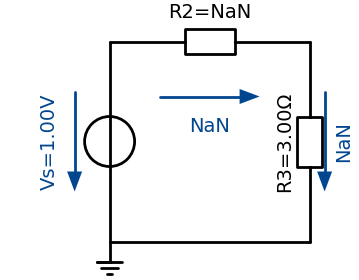

DCSolution(circuit=Circuit(components=[Component(type='dc_voltage_source', id='Vs', nodes=('3', '0'), value={'V': 1, 'R': 0, 'w': 0, 'phi': 0}), Component(type='resistor', id='R2', nodes=('3', '2'), value={'R': nan}), Component(type='resistor', id='R3', nodes=('2', '0'), value={'R': 3}), Component(type='ground', id='0', nodes=('0',), value={})], ground_node='0'), solver=<function nodal_analysis_bias_point_solver at 0x13a0fb0a0>)

In [2]:
with sce.Schematic(unit=4) as schematic:
    schematic += sce.VoltageSource(V=1, reverse=True, name='Vs')
    schematic += sce.Resistor(R=float('nan'), name='R2').right()
    schematic += sce.Resistor(R=3, name='R3').down()
    schematic += sce.Line().left()
    schematic += sce.Ground()
    schematic_solution = real_solution(schematic, precision=4)
    schematic += schematic_solution.draw_voltage('R2')
    schematic += schematic_solution.draw_voltage('R3')

schematic_solution.solution.solution

In [3]:
circuit = circuit_translator(schematic)
circuit

Circuit(components=[Component(type='dc_voltage_source', id='Vs', nodes=('3', '0'), value={'V': 1, 'R': 0, 'w': 0, 'phi': 0}), Component(type='resistor', id='R2', nodes=('3', '2'), value={'R': nan}), Component(type='resistor', id='R3', nodes=('2', '0'), value={'R': 3}), Component(type='ground', id='0', nodes=('0',), value={})], ground_node='0')

In [4]:
solution = SymoblicSolution(circuit)
V2 = sp.simplify(solution.get_voltage('R2'))
sp.pprint(V2)

nan


In [5]:
solution

SymoblicSolution(circuit=Circuit(components=[Component(type='dc_voltage_source', id='Vs', nodes=('3', '0'), value={'V': 1, 'R': 0, 'w': 0, 'phi': 0}), Component(type='resistor', id='R2', nodes=('3', '2'), value={'R': nan}), Component(type='resistor', id='R3', nodes=('2', '0'), value={'R': 3}), Component(type='ground', id='0', nodes=('0',), value={})], ground_node='0'), solver=<function symbolic_nodal_analysis_bias_point_solver at 0x13a0fb130>)